# **Introduce : Home Credit Default Risk Competition**

## 목적 : 과거 대출신청 데이터를 활용하여 신청자가 대출을 상환할 수 있을지 여부 예측

## Data Description

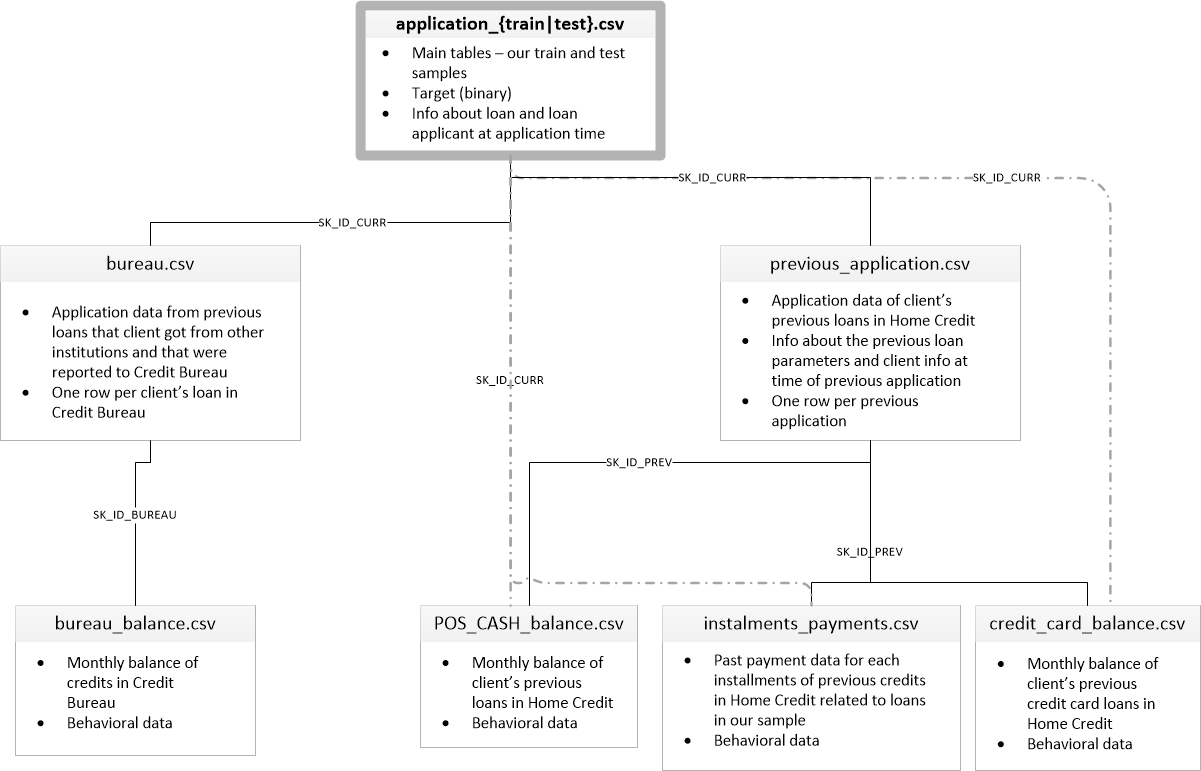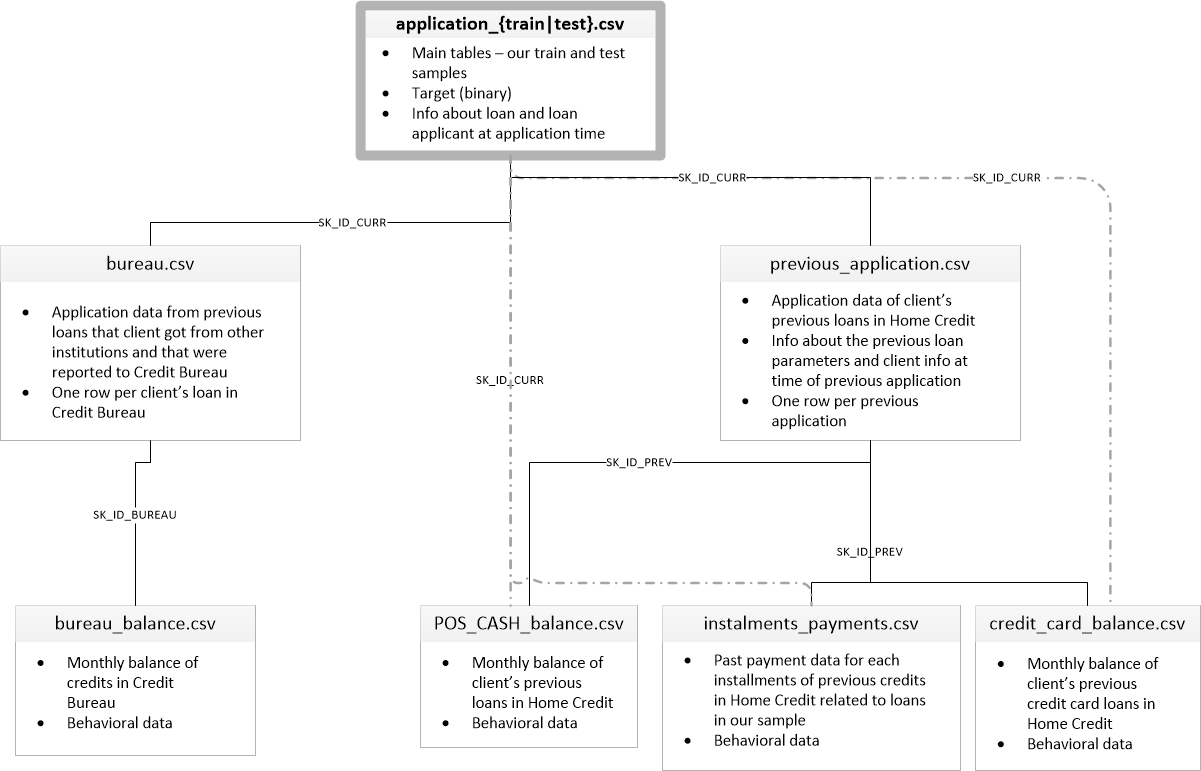

application_{train|test}.csv : Home Credit의 대출신청에 대한 정보를 포함하는 주요 데이터, target 0 = 대출 상환됨, 1 = 대출 상환되지 않음, SK_ID_CURR 로 식별  
bureau : 다른 금융기관에서 제공한 모든 고객의 이전 크레딧  
bureau_balance : 이전 크레딧에 대한 월별 잔액  
previous_application : 신청 데이터에 대출이 있는 고객의 모든 이전 주택 신용 대출 신청, SK_ID_PREV 로 식별  
POS_CASH_BALANCE : 고객들이 홈크레딧에서 이전 POS(판매시점) 및 현금 대출의 월별 잔액 스냅샷   
credit_card_balance : 홈크레딧에 가지고 있는 이전 신용카드의 월별 잔액 스냅샷  
installments_payment : 크레딧에 대한 상환 이

### imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### Read data

In [2]:
app_train = pd.read_csv('data/home_credit_default_risk/application_train.csv')
print('training data shape : ', app_train.shape)
app_train.head()

training data shape :  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_test = pd.read_csv('data/home_credit_default_risk/application_test.csv')
print('testing data shape : ', app_test.shape)
app_test.head()

testing data shape :  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### **EDA**

#### Examine the Distribution of the Target Column

In [4]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

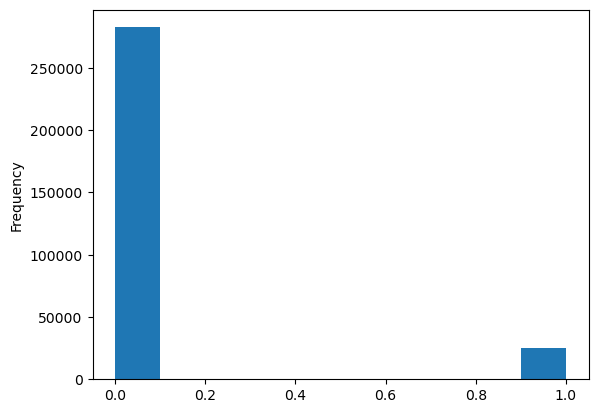

In [5]:
app_train['TARGET'].astype(int).plot.hist()

Imbalaned class problem  
제때 상환한 대출(0)이 더 많다  
불균형 반영하기 위해 가중치 둘 수 있음

#### Examine Missing Values

In [6]:
def missing_values_table(df) :
    # total missing values
    mis_val = df.isnull().sum()
    # percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    # make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis =1)
    # rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'missng values', 1 : '% of total values'})
    # sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of total values', ascending=False).round(1)
    # print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" 
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    return mis_val_table_ren_columns

In [7]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,missng values,% of total values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


#### Column types

In [8]:
# number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [9]:
# number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Encoding Categorical Variables

Label encoing : 각 고유한 범주를 정수로 갖는 범주형 변수에 할당  
문제점 : 범주에 임의의 순서를 부여, 고유한 값이 두 개 이상인 경우 One-hot이 안전  
One-hot encoding : 범주형 변수의 각 고우 범주에 대한 새 열을 생성  
단점 : 많은 범주를 갖는 범주형 변수들로 특징의 수가 폭발할 수 있음  
-> 차원의 수 줄여야함

**범주가 2개인 변수는 레이블 인코딩, 2개 이상인 변수는 원핫 인코딩 사용**

#### Label encoding and One-hot encoding  

In [10]:
# create a label coder object
le = LabelEncoder()
le_count = 0

# iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
            app_train[col] = le.fit_transform(app_train[col])
            app_test[col] = le.transform(app_test[col])

            le_count += 1

print('%d columns were label encoded.' %le_count)

3 columns were label encoded.


In [11]:
# One-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('training features shape:', app_train.shape)
print('testing features shape:', app_test.shape)

training features shape: (307511, 243)
testing features shape: (48744, 239)


#### Aligning training and testing data

train, test data에 모두 동일한 column이 있어야 함  
test data에 범주가 표시되지 않은 범주형 변수가 있어 one-hot 인코딩으로 인해 더 많은 열이 생성됨  
test data에 없는 train data column을 제거하려면 **데이터프레임 정렬**이 필요  
1. train data에서 대상 열 추출
2. 정렬시 axis = 1설정해 열 기준으로 정렬해야함

In [12]:
train_labels = app_train['TARGET']

# 두 데이터 프레임에 있는 열만 유지
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

app_train['TARGET'] = train_labels

print('training features shape:', app_train.shape)
print('testing features shape:', app_test.shape)

training features shape: (307511, 240)
testing features shape: (48744, 239)


DataFrame.align(other, join='outer', axis=None, level=None, copy=True, fill_value=None, method=None, limit=None, fill_axis=0, broadcast_axis=None)  
두 객체를 특정 기준들이 맞추어 정렬하는 메서드  
두 개의 데이터를 튜플 형태로 반환  
join : inner = 교집합, outer = 합집합

#### Anomalies  
이상현상  


In [13]:
# 현재 대출 신청을 기준으로 기록되어 음수, 연 단위로 보기위해 -365로 나눔
app_train['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [14]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [15]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5, 0, 'Days employment')

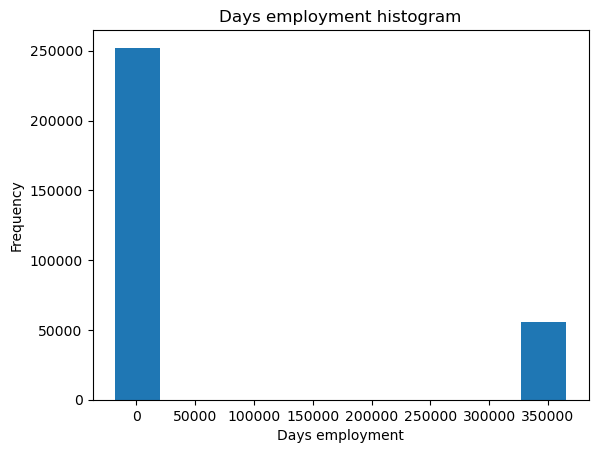

In [16]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days employment histogram')
plt.xlabel('Days employment')

In [17]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' %(100*non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' %(100*anom['TARGET'].mean()))
print('There are %d anmalous days of employment' %len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anmalous days of employment


Text(0.5, 0, 'days employment')

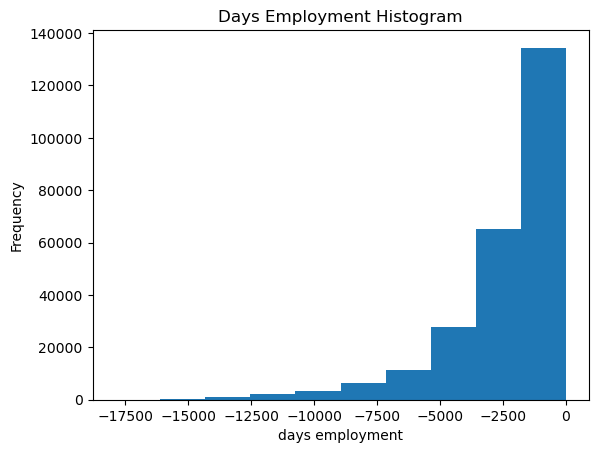

In [18]:
# create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('days employment')

In [19]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243

app_test['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace = True)

print('there are %d anomalies in the test data out of %d entries' %(app_test['DAYS_EMPLOYED_ANOM'].sum(), len(app_test)))

there are 9274 anomalies in the test data out of 48744 entries


#### Correlations  

  correltions between the features and the target

In [20]:
# find correaltions with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# display correlations
print('most positive correlations:\n', correlations.tail(15))
print('\nmost negative correlations:\n', correlations.head(15))

most positive correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

most negati

DAYS_BIRTH 가 가장 positive한 상관관계  
DAYS_BIRTH는 대출 당시 클라이언트의 나이  
상관관계는 양수이나 이 기능의 값은 실제로 음수  
즉, 고객이 나이가 들수록 대출 불이행 가능성이 낮다

#### Effect of Age on Repaymnet

In [21]:
# find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830984513

고객이 나이가 들수록 대출금을 제때 상환하는 경우가 많아짐

Text(0, 0.5, 'Count')

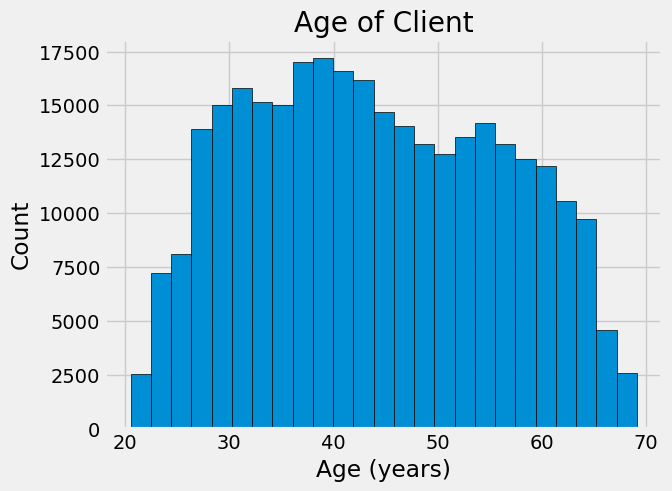

In [22]:
plt.style.use('fivethirtyeight')

# plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, bins = 25,edgecolor = 'k')
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

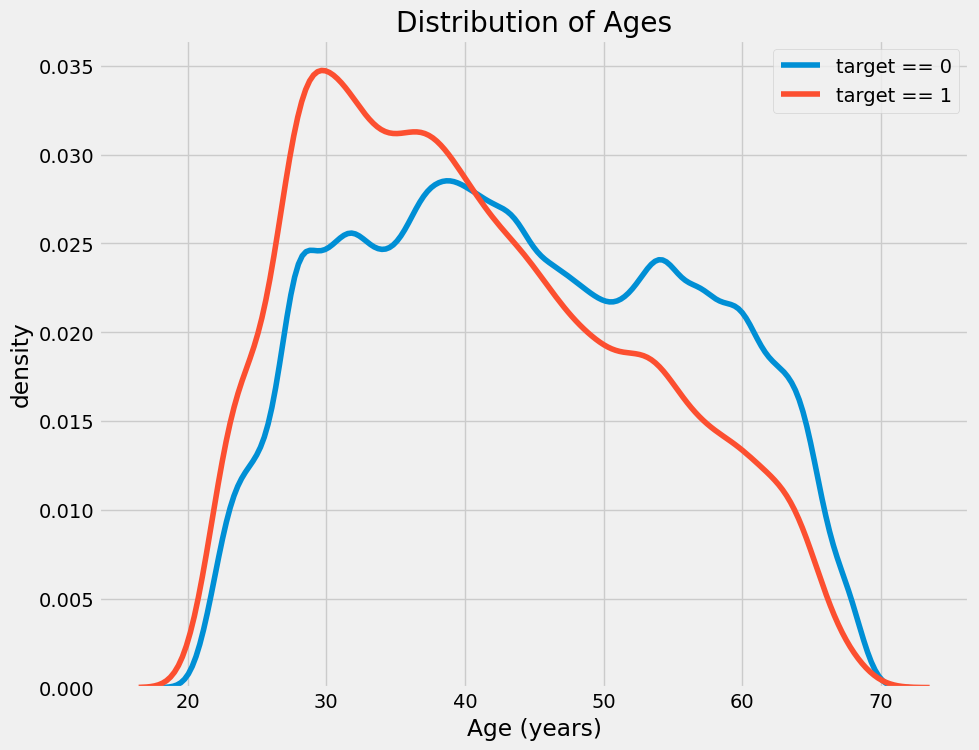

In [23]:
plt.figure(figsize=(10,8))

# kedplot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# kedplot of loans that were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel('Age (years)')
plt.ylabel('density')
plt.title('Distribution of Ages')
plt.legend()

In [24]:
# age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] /365

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20,70,num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [25]:
# group by the bin and calculate averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

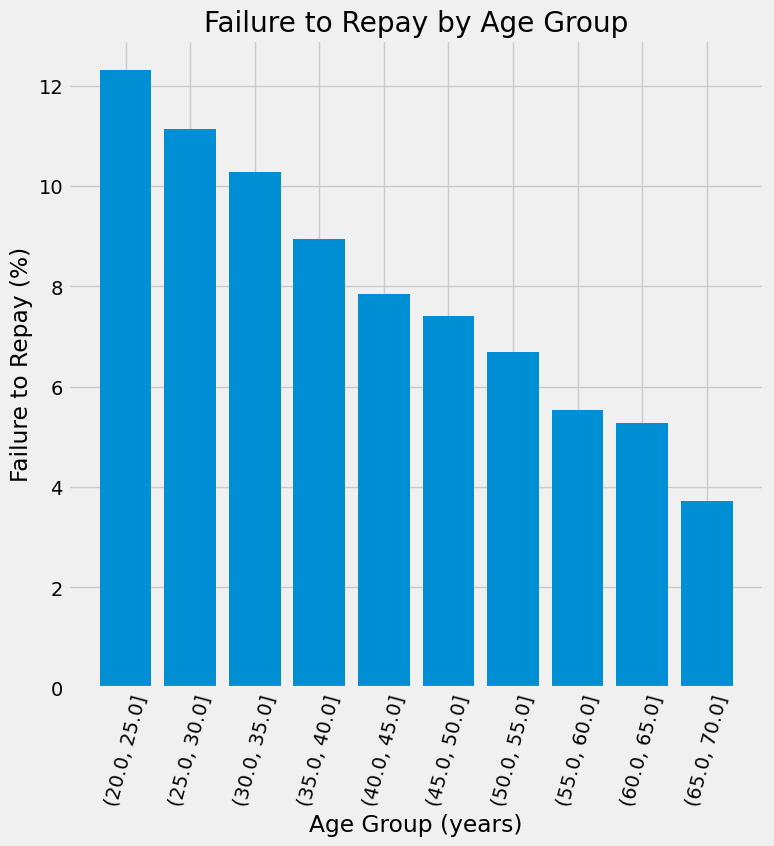

In [26]:
plt.figure(figsize=(8,8))

plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])

plt.xticks(rotation = 75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

젊을수록 상환 실패율이 높다  


#### Exterior Sources  
외부 데이터 소스의 정규화된 점수를 나타냄  
EXT_SOURCE_1, 
EXT_SOURCE_, 
EXT_SOURCE_= 가장 negative한 상관관계를 보이는 변수
1 

In [27]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

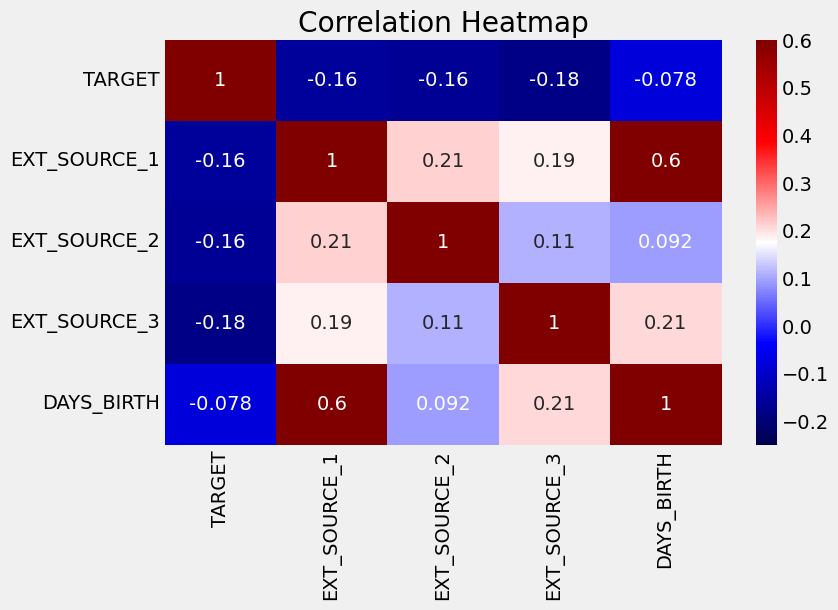

In [28]:
plt.figure(figsize=(8,5))

sns.heatmap(ext_data_corrs, annot = True, cmap = 'seismic', vmin = -0.25,  vmax = 0.6)
plt.title('Correlation Heatmap')

EXT_SOURCE는 TARGET과 음의 상관관계를 가짐  
EXT_SOURCE증가할수록 대출금 상환할 가능성이 높음 (TARGET = 0이 상환한 것)
DAYS_BIRTH와 EXT_SOURCE_1가 양의 상관관계  
EXT_SOURCE_1가 클라이언트의 연령일 수 있음

we can look at the distribution of each of these features colored by the value of the target.

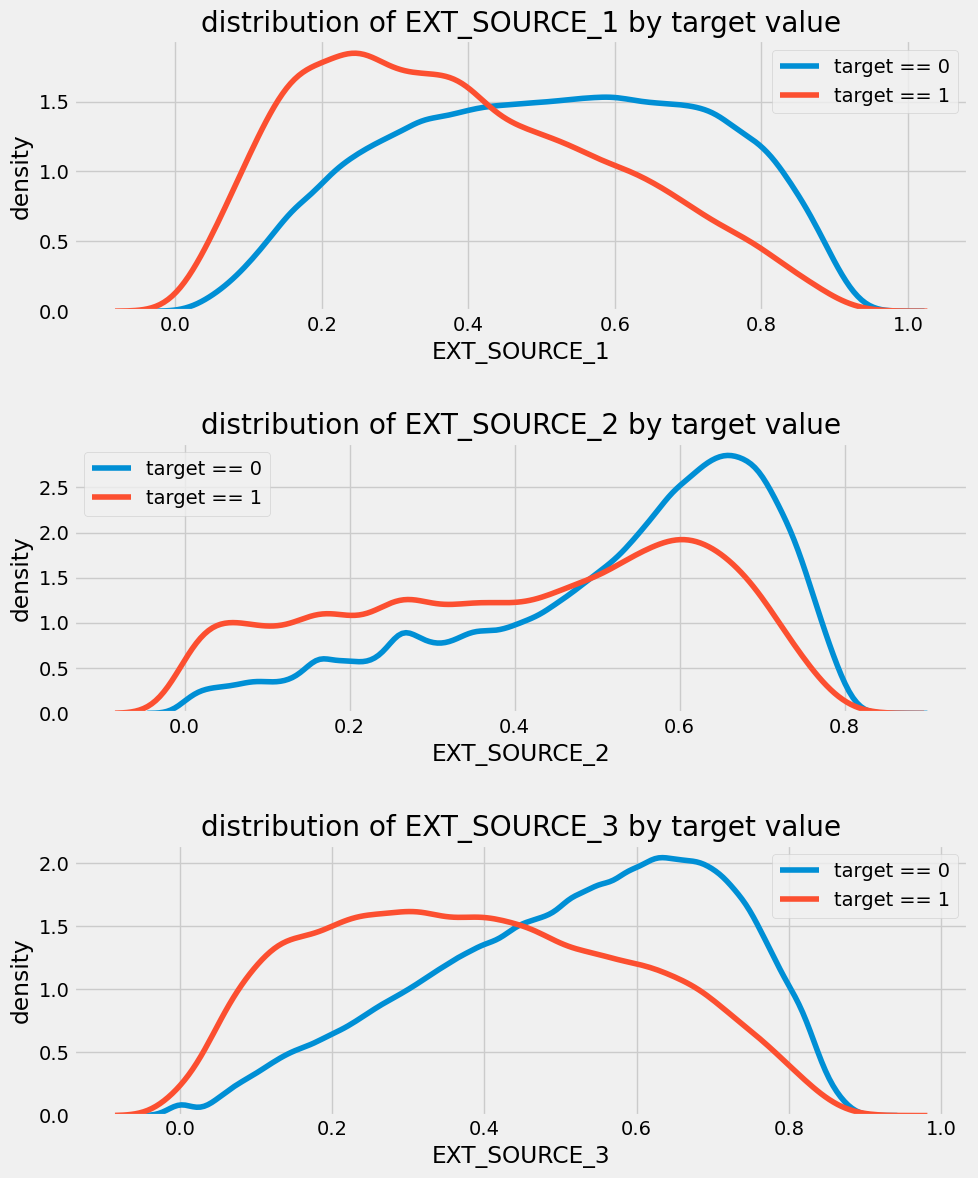

In [29]:
plt.figure(figsize=(10,12))

for i, source in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')

    plt.title('distribution of %s by target value' % source)
    plt.xlabel('%s' %source)
    plt.ylabel('density')
    plt.legend()

plt.tight_layout(h_pad = 2.5)


#### Pair plot


Text(0.5, 1.05, 'Ext Source and Age Features Pairs Plot')

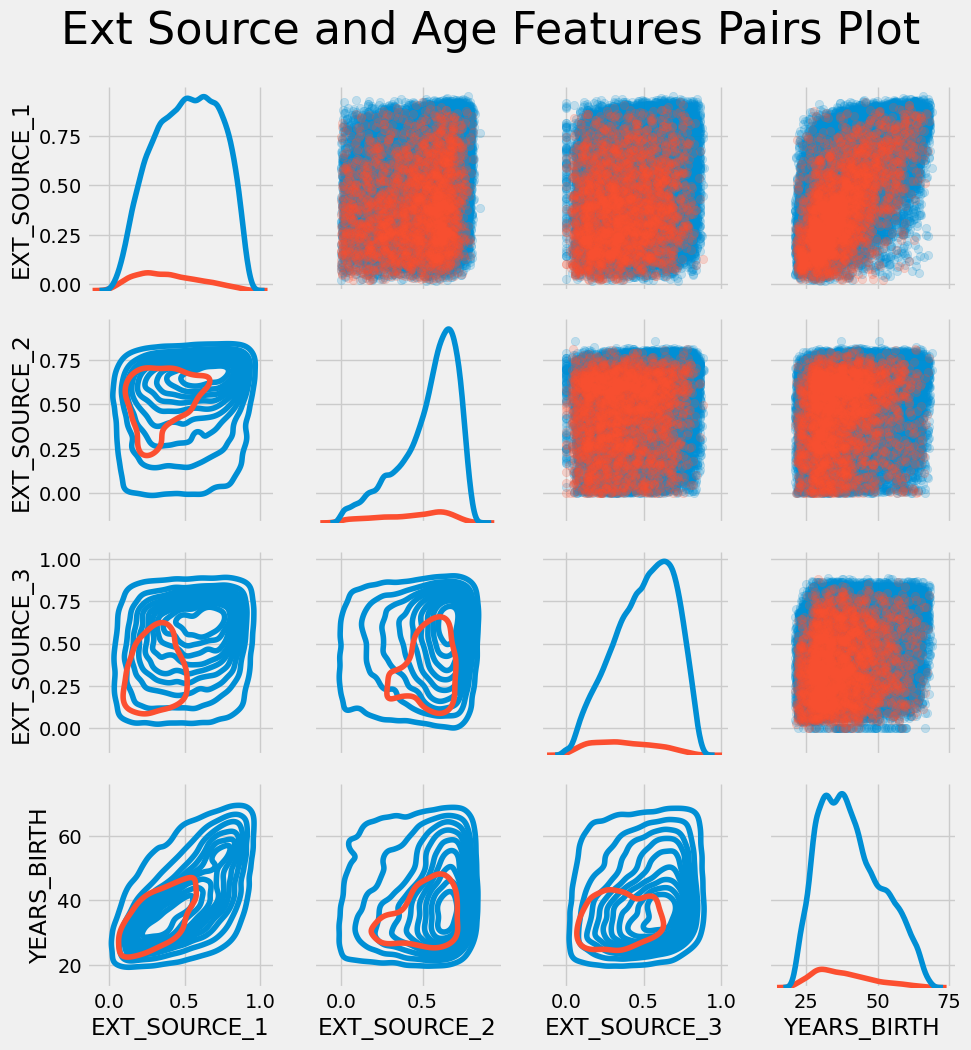

In [30]:
plot_data = ext_data.drop(columns=['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x,y,**kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate('r = {:.2f}'.format(r), xy = (.2, .8), xycoords=ax.transAxes, size = 20)

# create the pairgrid object
grid = sns.PairGrid(data = plot_data, diag_sharey=False, hue = 'TARGET',
                   vars = [ x for x in list(plot_data.columns) if x != 'TARGET'])

# upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)
# diagonal is a histogram
grid.map_diag(sns.kdeplot)
# bottom os density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)

### **Feature Engineering**

기능 구성 = 기존 데이터에서 새로운 기능 추가  
기능 선택 = 가장 중요한 기능만 선택하거나 다른 차원 축소 방법 선택

#### Polynomial Features  
간단한 특징 구성 방법  
각 변수들을 곱하거나 제곱해 새로운 변수를 자동으로 만들어줌  
원본 feature 데이터 셋을 기반으로 차수에 따른 다항식을 적용하여 새로운 피처들을 생성하는 클래스  
입력데이터를 여러 다항식으로 변환


In [31]:
# make a new dataframe fo polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

#imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

# need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

#create the polynimial object with specifued degree
poly_transformer =PolynomialFeatures(degree = 3)

In [32]:
# train the polynomial features
poly_transformer.fit(poly_features)

# transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape:', poly_features.shape)

Polynomial Features shape: (307511, 35)


상당한 수의 새로운 특징들을 만들어냄  
이름을 얻기 위해 get_feature_names 이용  
각 열의 특성이 각각 어떤 입력의 조합으로 만들어졌는지 알려줌

In [33]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]


array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

In [34]:
# create a dataframe of the features
poly_features = pd.DataFrame(poly_features, columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# add in the target
poly_features['TARGET'] = poly_target

# find the correlation with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [39]:
# put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']))

# merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# merge polynomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# align the df
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis =1)

#print out the new shape
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape: ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:  (48744, 275)


#### Domain Knowledge Features  

고객이 대출을 불이행할지 여부를 판단하는데 중요할 수 있는 몇가지 특징을 만듬  
Credit_INCERNIT_PERCENT: 고객의 소득 대비 신용 금액의 백분율  
Annuity_INCERNITE_PERCENT: 고객의 소득 대비 대출 연금의 율  

Credit_TERM : 월 단위로 납입기간(연금은 만기월액이)   
)
DAYS_YOUND_PERCENT: 고객의 연령 대비 고용된 일수의 백분율

In [40]:
app_train.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes', 'TARGET',
       'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=241)

In [42]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [43]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

#### Visualize new varialbes

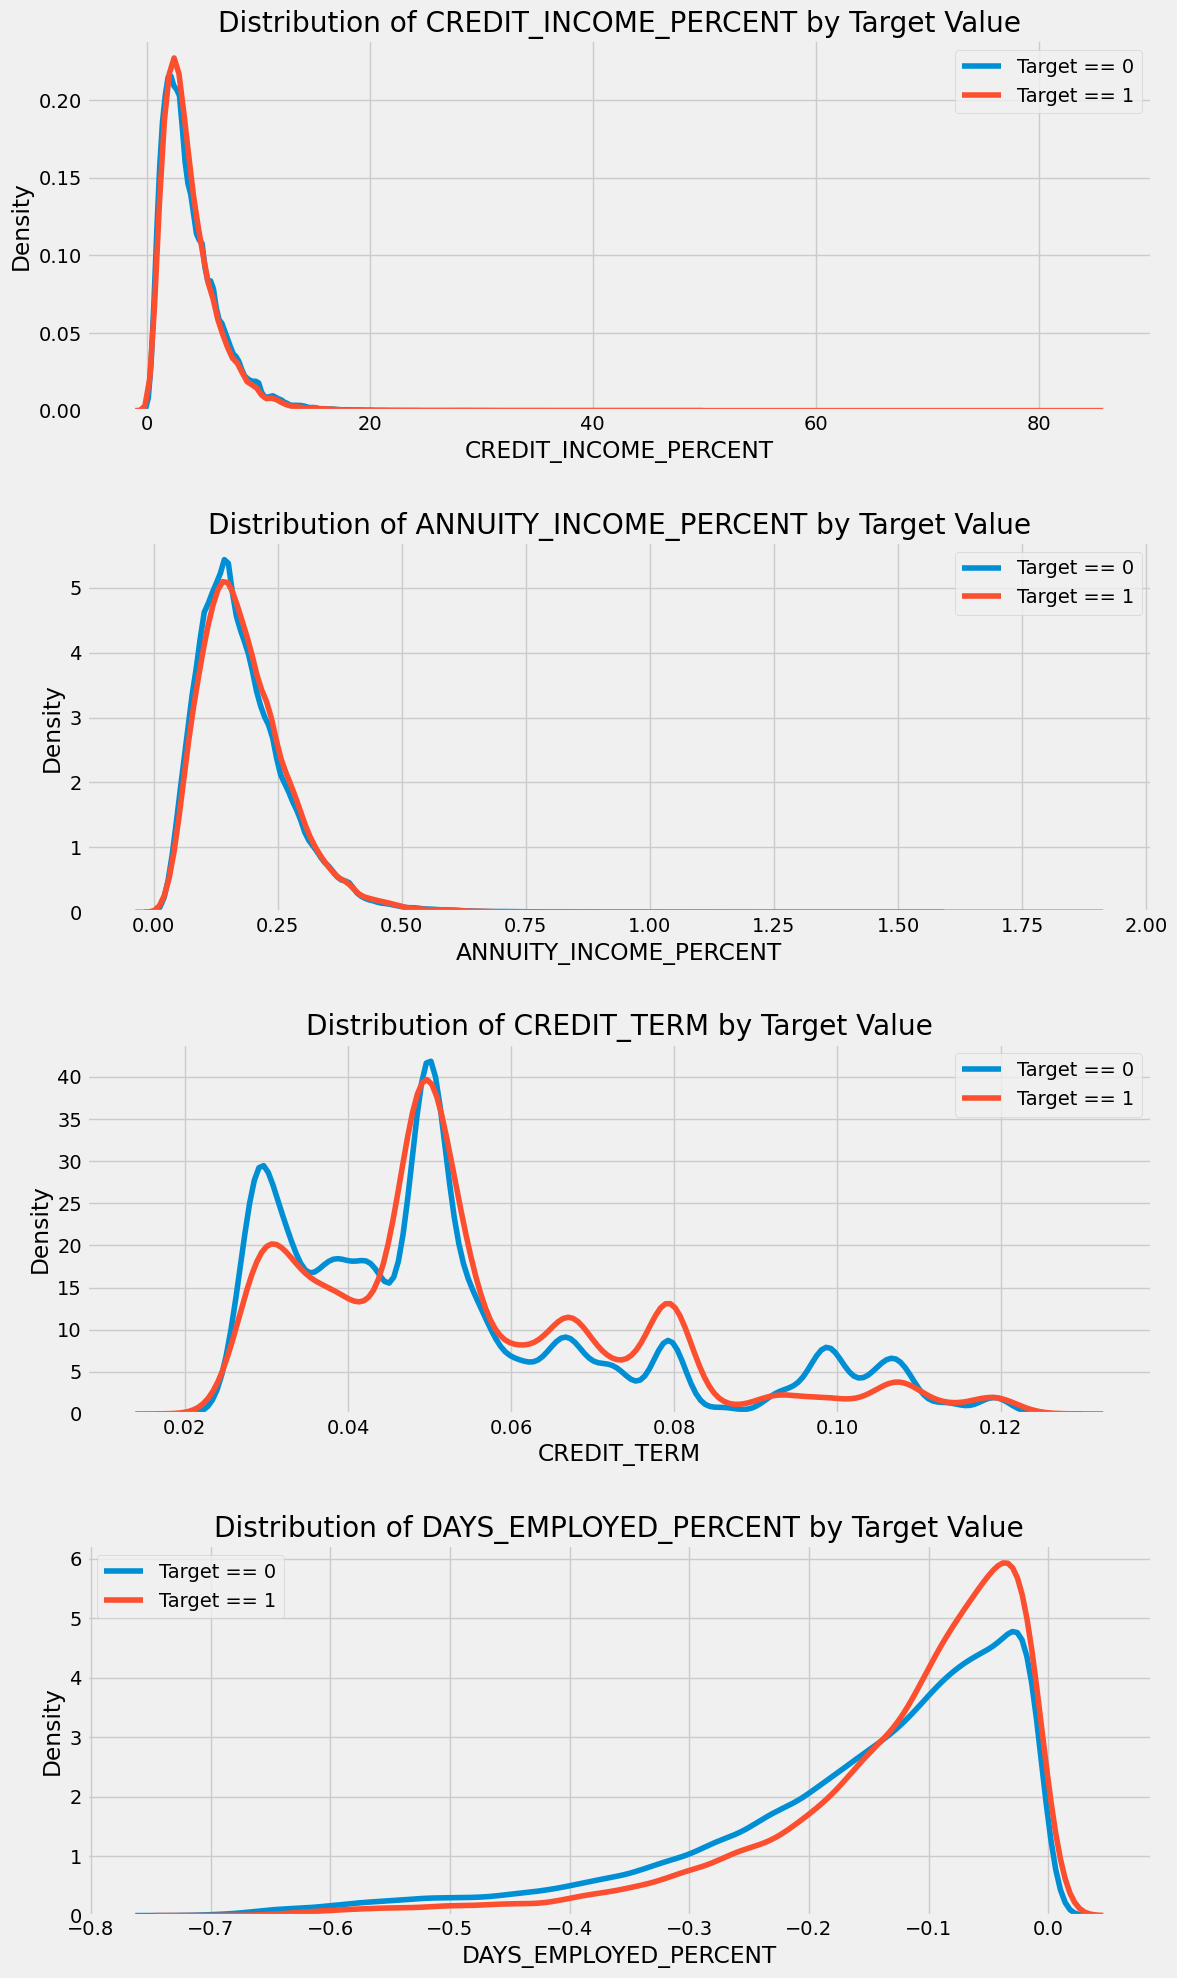

In [44]:
plt.figure(figsize = (12,20))
#iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4,1,i+1)
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'Target == 0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'Target == 1')

    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' %feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout(h_pad = 2.5)

### **Logistic Regression Implementation**

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# drop the target form the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()

features = list(train.columns)
test = app_test.copy()

imputer = SimpleImputer(strategy= 'median')
scaler = MinMaxScaler(feature_range= (0,1))

imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

In [47]:
log_reg_pred = log_reg.predict_proba(test)[:,1]

In [48]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


In [49]:
submit.to_csv('log_reg_baseline.csv', index = False)

### **Improved Model: Random Forest**

In [50]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 100, random_state= 50, verbose = 1, n_jobs = -1)

In [53]:
random_forest.fit(train, train_labels)

feture_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature' : features, 'importance' : feture_importance_values})

predictions = random_forest.predict_proba(test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


In [54]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

submit.to_csv('random_forest_baseline.csv', index = False)

#### Make Predictions using Engineered Features  
feature engineering의 효과를 측정하기 위함

In [56]:
poly_features_names = list(app_train_poly.columns)

imputer = SimpleImputer(strategy= 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

scaler = MinMaxScaler(feature_range = (0,1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators= 100, random_state= 50, verbose = 1, n_jobs = -1)

In [57]:
random_forest_poly.fit(poly_features, train_labels)

predictions = random_forest_poly.predict_proba(poly_features_test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   57.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.1s finished


In [58]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_engineered.csv', index = False)

#### testing Domain Features

In [59]:
app_train_domain = app_train_domain.drop(columns = 'TARGET')

domain_features_names = list(app_train_domain.columns)

imputer = SimpleImputer(strategy='median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

scaler = MinMaxScaler(feature_range= (0,1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

random_forest_domain.fit(domain_features, train_labels)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.2s finished


In [60]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline_domain.csv', index = False)

#### Model Interpretation : Feature Importances

In [62]:
def plot_feature_importances(df):
    # sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    # normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # make a horiziontal bar chart of feature importances
    plt.figure(figsize=(10,6))
    ax = plt.subplot()

    # need to reverse tne index to plot most important o top
    ax.barh(list(reversed(list(df.index[:15]))), df['importance_normalized'].head(15),
           align = 'center' , edgecolor = 'k')

    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))

    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()

    return df

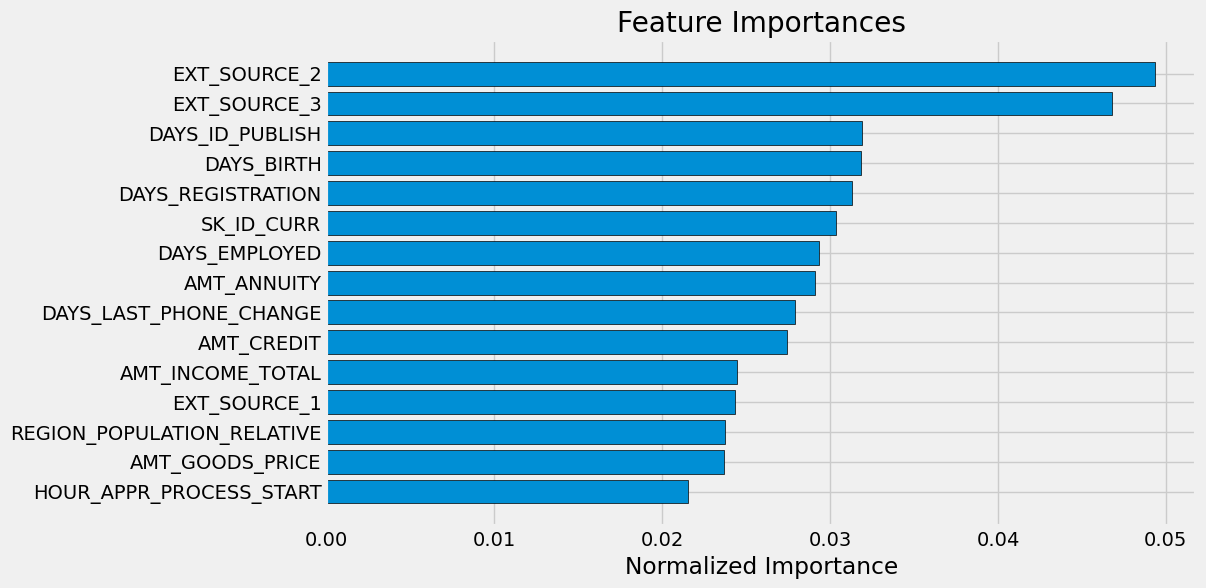

In [63]:
feature_importances_sorted = plot_feature_importances(feature_importances)

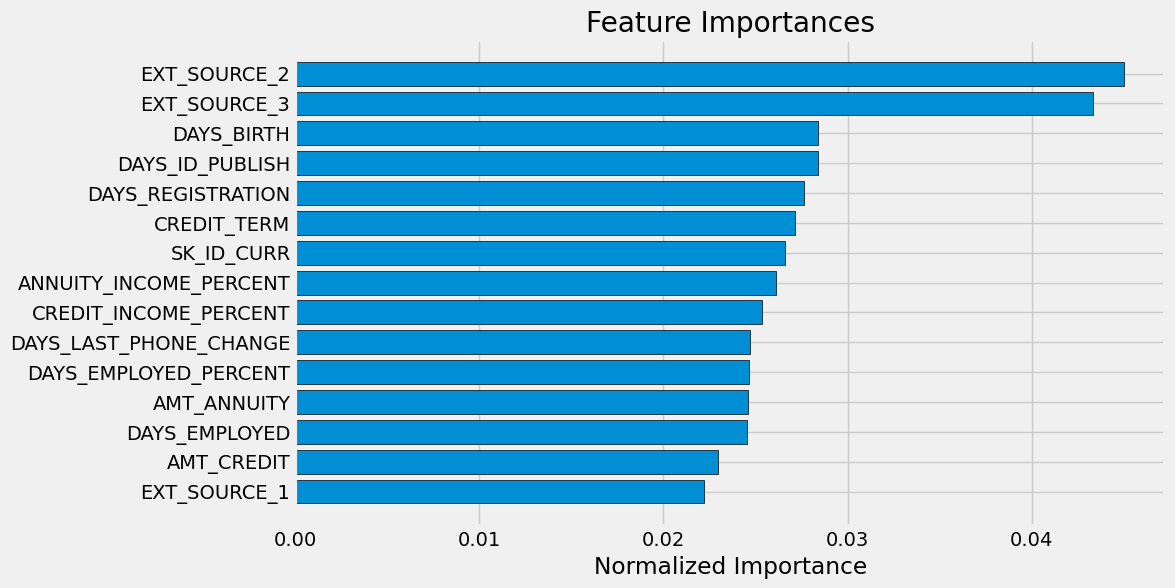

In [64]:
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

도메인 지식을 활용한 특징들이 상위 15 안에 속함